# Emiliano D'Elia Cerchi

In [76]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
sns.set_style('whitegrid')

# Data Dictionary

| Name | Format | Description|
|---|---|---|
| cnae3 | Char(3) | Code of the CNAE (Spanish national classification of economic activities)|
| dcnae_agr3 | Char(150) | Description for CNAE (in Spanish)|
| provincia | Char(2) | Code of the Spanish province where the company is based|
| anio | Numeric | Company's Foundation Year|
| gradvinc | Numeric | Engagement measure of the company with the bank (the less the value the more engaged the company is)|
| nopotra | Numeric | Number of services (payments, colletions, etc.) the company has contracted with the bank|
| noprovin | Numeric | Number of products the company has contracted with the bank|
| fact | Numeric|  Amount of money the cards emited by the bank wasted in the POS owned by the company
| volneg | Numeric | Amount of business the company has in the bank|
| num_bancos | Numeric | Number of banks where the company owns a POS service|
| pmc | Numeric | Average collection period| 
| target Binary (0/1) | --- |  This is the value to predict, it takes the values (1: the company contracted the POS in the following 3 months, 0: the company did not contracted the POS in that period)|

# About the data
* Data is related to payment services provided to companines across Spain
* Payments are great way to start having a primary banking relationships with other businesses
* POS becomes a powerful tool to ensure a strong relationship with our SMEs customers, and they also become a powerful source of information and other services for SMEs
* I ask you to build a model that will help the salesforce identify those customers in which they should prioritise their commercial activity in the following weeks to maximise the no of sales

# __Section 1:__ Understanding the Data
* How does the target variable behave when compared to other variables?
* Are there any interesting interactions between variables?
* What __kind__ of correlations do we have across our data?
* Which features are correlated the most to our target feature?

In [77]:
train = pd.read_csv("20220512_train.txt", sep = ";")
test = pd.read_csv("20220512_test_no_target.txt", sep = ";")

In [78]:
train.head()

,id,cnae3,dcnae_agr3,provincia,anio,gradvinc,noprotra,noprovin,volneg,fact,num_bancos,pmc,target
0,616016,432,INSTALACIONES ELECTRICAS. DE FONTANERIA Y OTRA...,28,2016.0,1,4,4,86062.25,NaN,NaN,NaN,1
1,243724,411,PROMOCION INMOBILIARIA,28,1992.0,5,0,0,0.00,NaN,NaN,NaN,0
2,637325,960,OTROS SERVICIOS PERSONALES,33,2018.0,5,0,0,0.00,NaN,NaN,NaN,0
3,385667,432,INSTALACIONES ELECTRICAS. DE FONTANERIA Y OTRA...,35,2004.0,1,4,4,174966.92,NaN,NaN,NaN,0
4,605174,466,COMERCIO AL POR MAYOR DE OTRA MAQUINARIA. EQUI...,50,2013.0,5,0,0,0.00,NaN,NaN,75.73,0


In [79]:
train.shape

(24921, 13)

In [80]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24921 entries, 0 to 24920
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          24921 non-null  int64  
 1   cnae3       24921 non-null  int64  
 2   dcnae_agr3  24914 non-null  object 
 3   provincia   24718 non-null  object 
 4   anio        24813 non-null  float64
 5   gradvinc    24921 non-null  int64  
 6   noprotra    24921 non-null  int64  
 7   noprovin    24921 non-null  int64  
 8   volneg      24921 non-null  float64
 9   fact        3614 non-null   float64
 10  num_bancos  3614 non-null   float64
 11  pmc         9095 non-null   float64
 12  target      24921 non-null  int64  
dtypes: float64(5), int64(6), object(2)
memory usage: 2.5+ MB


In [81]:
train.isnull().sum() #we have lots of null values in some features

id                0
cnae3             0
dcnae_agr3        7
provincia       203
anio            108
gradvinc          0
noprotra          0
noprovin          0
volneg            0
fact          21307
num_bancos    21307
pmc           15826
target            0
dtype: int64

In [82]:
#proportion of null values
null_provincias = train['provincia'].isnull()
null_provincias.value_counts(normalize=True)

False    0.991854
True     0.008146
Name: provincia, dtype: float64

In [83]:
#proportion of null values
null_anio = train['anio'].isnull()
null_anio.value_counts(normalize=True)

False    0.995666
True     0.004334
Name: anio, dtype: float64

In [84]:
#checking out proportion of null values
null_fact = train['fact'].isnull()
null_fact.value_counts(normalize=True)

True     0.854982
False    0.145018
Name: fact, dtype: float64

In [85]:
#checking out proportion of null values
null_bancos = train['num_bancos'].isnull()
null_bancos.value_counts(normalize=True)

True     0.854982
False    0.145018
Name: num_bancos, dtype: float64

In [86]:
#checking out proportion of null values
null_pmc = train['pmc'].isnull()
null_pmc.value_counts(normalize=True)

True     0.635047
False    0.364953
Name: pmc, dtype: float64

## Observations
* `fact` is ~85% null values 
* `num_bancos` is ~85% null values
* `pmc` is ~65% null values
* A reasonable strategy would be just to drop these features since they add no valuable information to the analysis

# __Section 2:__ Formatting

In [87]:
#changing column names to make features more readable
train.columns = train.columns.str.replace("noprotra", "no_of_services") #no of services the company has contracted from the bank
train.columns = train.columns.str.replace("noprovin", "no_of_products") #no of products the company has contracted from the bank
train.columns = train.columns.str.replace("volneg", "amount_in_bank") #amount of business the company has in the bank
train.columns = train.columns.str.replace("pmc", "avg_collection_period") 
train.columns = train.columns.str.replace("anio", "foundation_year") 
train.columns = train.columns.str.replace("gradvinc", "engagement_metric") 
train.columns = train.columns.str.replace("dcnae_agr3", "company_type") 

#applying the same formatting to test_data
#changing column names to make features more readable
test.columns = test.columns.str.replace("noprotra", "no_of_services") #no of services the company has contracted from the bank
test.columns = test.columns.str.replace("noprovin", "no_of_products") #no of products the company has contracted from the bank
test.columns = test.columns.str.replace("volneg", "amount_in_bank") #amount of business the company has in the bank
test.columns = test.columns.str.replace("pmc", "avg_collection_period") 
test.columns = test.columns.str.replace("anio", "foundation_year") 
test.columns = test.columns.str.replace("gradvinc", "engagement_metric") 
test.columns = test.columns.str.replace("dcnae_agr3", "company_type") 

# Updated Data Dictionary

| Name | Format | Description|
|---|---|---|
| cnae3 | Char(3) | Code of the CNAE (Spanish national classification of economic activities)|
| company_type | Char(150) | Description for CNAE (in Spanish)|
| provincia | Char(2) | Code of the Spanish province where the company is based|
| foundation_year | Numeric | Company's Foundation Year|
| engagement_metric | Numeric | Engagement measure of the company with the bank (the less the value the more engaged the company is)|
| no_of_services | Numeric | Number of services (payments, colletions, etc.) the company has contracted with the bank|
| no_of_products | Numeric | Number of products the company has contracted with the bank|
| fact | Numeric|  Amount of money the cards emited by the bank wasted in the POS owned by the company
| amount | Numeric | Amount of business the company has in the bank|
| num_bancos | Numeric | Number of banks where the company owns a POS service|
| avg_collection_period | Numeric | Average collection period| 
| target Binary (0/1) | --- |  This is the value to predict, it takes the values (1: the company contracted the POS in the following 3 months, 0: the company did not contracted the POS in that period)|

In [88]:
#is there correlation within my data?
corr = train.corr()

#fill diagonal and upper half with NaNs
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

,id,cnae3,foundation_year,engagement_metric,no_of_services,no_of_products,amount_in_bank,fact,num_bancos,avg_collection_period,target
id,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
cnae3,0.11,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
foundation_year,0.59,0.14,nan,nan,nan,nan,nan,nan,nan,nan,nan
engagement_metric,-0.17,0.02,-0.07,nan,nan,nan,nan,nan,nan,nan,nan
no_of_services,0.11,-0.02,0.04,-0.92,nan,nan,nan,nan,nan,nan,nan
no_of_products,-0.01,-0.10,-0.07,-0.60,0.61,nan,nan,nan,nan,nan,nan
amount_in_bank,-0.04,-0.03,-0.05,-0.14,0.17,0.23,nan,nan,nan,nan,nan
fact,-0.07,0.03,-0.06,-0.05,0.09,0.12,0.14,nan,nan,nan,nan
num_bancos,0.12,0.02,0.03,-0.31,0.30,0.24,0.07,0.15,nan,nan,nan
avg_collection_period,-0.01,-0.00,0.00,0.02,-0.01,-0.01,-0.00,-0.01,-0.04,nan,nan


## Observations
* __Negative Correlations__
    * `engagement_metric` and `no_services` have a very high negative correlation. This says that the higher the number of services contracted with the bank the better the engagement with the bank (high value == high satisfaction with services)
    * `engagement_metric` and `no_of_products` have a moderate negative correlation
    * `target` and `engagement_metric` have a low negative correlation

* __Positive Correlations__
    * `target` and `no_of_services` have a low positive correlation
    * `no_services` and `no_of_products` have a moderate positive correlation but this is no surprise




# Dealing with NaNs

In [89]:
train.isnull().sum()

id                           0
cnae3                        0
company_type                 7
provincia                  203
foundation_year            108
engagement_metric            0
no_of_services               0
no_of_products               0
amount_in_bank               0
fact                     21307
num_bancos               21307
avg_collection_period    15826
target                       0
dtype: int64

In [90]:
train = train.drop(columns=['fact', 'num_bancos', 'avg_collection_period', 'company_type']) #dropping in train
train.isnull().sum()

id                     0
cnae3                  0
provincia            203
foundation_year      108
engagement_metric      0
no_of_services         0
no_of_products         0
amount_in_bank         0
target                 0
dtype: int64

In [91]:
test = test.drop(columns=['fact', 'num_bancos', 'avg_collection_period', 'company_type']) #dropping in train

In [92]:
test.isnull().sum()

id                    0
cnae3                 0
provincia            27
foundation_year      13
engagement_metric     0
no_of_services        0
no_of_products        0
amount_in_bank        0
dtype: int64

In [93]:
#replacing null values in foundation with average value
train['foundation_year'] = train['foundation_year'].fillna(train['foundation_year'].mean())
test['foundation_year'] = test['foundation_year'].fillna(test['foundation_year'].mean())

#feature 'fact' has a big proportion of null-values
print(train['foundation_year'].isnull().value_counts(normalize=True))
print(test['foundation_year'].isnull().value_counts(normalize=True))

False    1.0
Name: foundation_year, dtype: float64
False    1.0
Name: foundation_year, dtype: float64


In [94]:
#removing rows with null values
train = train.dropna(how='any',axis=0) 

In [95]:
test.isnull().sum()

id                    0
cnae3                 0
provincia            27
foundation_year       0
engagement_metric     0
no_of_services        0
no_of_products        0
amount_in_bank        0
dtype: int64

In [96]:
train.isnull().sum() #no null values left

id                   0
cnae3                0
provincia            0
foundation_year      0
engagement_metric    0
no_of_services       0
no_of_products       0
amount_in_bank       0
target               0
dtype: int64

## Dropping customer ID

In [97]:
train = train.drop(columns=['id']) #droping from train, we must exclude any features that let's the model identify an instance

## Class Imbalance

In [98]:
#how many positive cases do we have?
train['target'].value_counts(normalize=True)

0    0.877094
1    0.122906
Name: target, dtype: float64

In [99]:
#how many positive cases do we have?
classes = train['target'].value_counts(normalize=True).to_frame()

Text(0, 0.5, 'Percentage (%)')

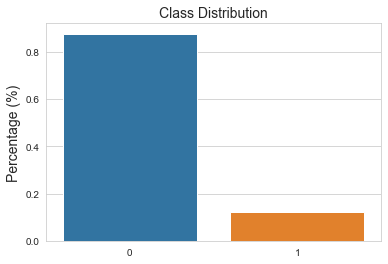

In [100]:
#plotting inbalance 
ax = sns.barplot(x=classes.index, y='target', data=classes)
ax.set_title('Class Distribution', fontsize=14)
ax.set_ylabel('Percentage (%)', fontsize=14)

### Observations
* Class=1 is very much underepresented
* We must take action since imbalanced datasets can suffer from bias from the overepresented class

# __Section 4:__ Building Baseline Models

In [101]:
#importing column transformers
from sklearn.pipeline import Pipeline

#importing classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier

#train-test split
from sklearn.model_selection import train_test_split

#evaluation metrics
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [102]:
#spliiting into y and X
X = train.drop(columns=['target'])
y = train['target']

In [103]:
X['provincia'] = X['provincia'].replace(["**"],'000')

In [104]:
#train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, shuffle=True)

In [105]:
# Fit a pipeline with transformers and an estimator to the training data
tree = DecisionTreeClassifier(random_state=123)

knn = KNeighborsClassifier(n_neighbors=5)

nb =  GaussianNB()

rf = RandomForestClassifier(random_state=123)

lg = LogisticRegression(random_state=123)

ridge_clf = RidgeClassifier(random_state=123)

lda = LinearDiscriminantAnalysis()

extra_trees = ExtraTreesClassifier(random_state=123)

In [106]:
# add the different pipelines to a list
models = [tree, knn, nb, rf, lg, ridge_clf, lda, extra_trees]
model_names = ["tree", "knn", "nb", "rf", "lr", "ridge_clf", 'lda', 'extra_trees']

In [107]:
baseline_model_scores = []

for model, model_names in zip(models, model_names):
    model.fit(x_train, y_train)
    y_hat = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_hat)
    roc_auc = cross_val_score(model, x_train, y_train, cv=10, scoring='roc_auc').mean()
    precision = precision_score(y_test, y_hat)
    recall = recall_score(y_test, y_hat)
    f1 = f1_score(y_test, y_hat)
    baseline_model_scores.append({
        "model" : model_names,
        "roc_auc" : roc_auc,
        "precision": precision, 
        'f1': f1, 
        'accuracy': accuracy, 
        'recall':recall})

In [108]:
baseline_model_scores
baseline_model_scores_df = pd.DataFrame(baseline_model_scores, columns = ["model",
                                                                          'precision',
                                                                          'recall',
                                                                          "accuracy", 
                                                                          'f1', 
                                                                          'roc_auc' 
                                                                          ]).set_index("model").sort_values(by = ["roc_auc"], ascending = False)
baseline_model_scores_df 

,precision,recall,accuracy,f1,roc_auc
model,,,,,
rf,0.506073,0.201939,0.875405,0.288684,0.851392
extra_trees,0.446352,0.168013,0.869741,0.244131,0.833035
lda,0.404040,0.064620,0.870955,0.111421,0.806024
ridge_clf,0.000000,0.000000,0.874798,0.000000,0.806023
knn,0.282511,0.101777,0.855178,0.149644,0.687184
tree,0.330218,0.342488,0.830704,0.336241,0.639704
nb,0.000000,0.000000,0.874798,0.000000,0.627826
lr,0.000000,0.000000,0.874595,0.000000,0.503380


## Choosing a Baseline Model: Comments
* For this particular case we want to correctly predict who is a potential client so we must focus on the `precision` metric
* `Precision` talks about how precise/accurate your model is by calculating out of those predicted positive, how many of them are actual positive
    * `Precision` is a good measure to determine, when the costs of False Positive is high. For instance, email spam detection. In email spam detection, a false positive means that an email that is non-spam (actual negative) has been identified as spam (predicted spam). The email user might lose important emails if the precision is not high for the spam detection model
    * The costs of `False Positives` is high in our case because we may end up targetting and investing marketing funds and efforts into companies that are not likely to be interested in our services
* `Recall` is also a good metric in this case, Recall shall be the model metric we use to select our best model when there is a high cost associated with `False Negative` cases
    * For instance, in fraud detection or sick patient detection. If a fraudulent transaction (Actual Positive) is predicted as non-fraudulent (Predicted Negative), the consequence can be very bad for the bank, in our case, we are dealing with the lost opportunity of targetting a potential client with the promotion. 
* Given the two metrics and due to the nature of the problem we shall use precision as the company must avoid at all costs wasting money in clients that are most likely not interested in doing business with us


# __Section 5:__ Improving Baseline Models with `upsampling`
>Note: Since we are balancing data we can use the `roc_auc` metric to measure and compare model performance.
>>How to interpret the metric: The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes. A model whose predictions are 100% correct has an AUC of 100%

In [109]:
#importing resampling tool to correct class imbalance with upsampling
from sklearn.utils import resample

#separating majority and minority classes
df_majority = train[train.target==0]
df_minority = train[train.target==1]

#upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=21883,    # to match majority class
                                 random_state=123) # reproducible results

#combine majority class with upsampled minority class
data_upsampled = pd.concat([df_majority, df_minority_upsampled])

#display new class counts
data_upsampled.target.value_counts()

#assigning balanced dataset to train set
train_upsampled = data_upsampled

train_upsampled['target'].value_counts().to_frame()

,target
1,21883
0,21680


In [110]:
#how many positive cases do we have?
classes = train_upsampled['target'].value_counts(normalize=True).to_frame()

Text(0, 0.5, 'Percentage (%)')

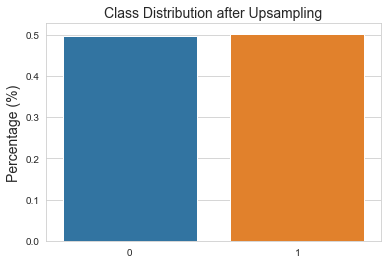

In [111]:
#plotting inbalance 
ax = sns.barplot(x=classes.index, y='target', data=classes)
ax.set_title('Class Distribution after Upsampling', fontsize=14)
ax.set_ylabel('Percentage (%)', fontsize=14)

In [112]:
#spliiting into y and X
X = train_upsampled.drop(columns=['target'])
y = train_upsampled['target']

In [113]:
X['provincia'] = X['provincia'].replace(["**"],'000')

In [114]:
#train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, shuffle=True)

In [115]:
#adding the different algorithms to a list
models = [tree, knn, nb, rf, lg, ridge_clf, lda]
model_names = ["tree", "knn", "nb", "rf", "lr", "ridge_clf", 'lda']

In [116]:
baseline_model_scores = []

for model, model_names in zip(models, model_names):
    model.fit(x_train, y_train)
    y_hat = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_hat)
    roc_auc = cross_val_score(model, x_train, y_train, cv=10, scoring='roc_auc').mean()
    precision = precision_score(y_test, y_hat)
    recall = recall_score(y_test, y_hat)
    f1 = f1_score(y_test, y_hat)
    baseline_model_scores.append({
        "model" : model_names,
        "roc_auc" : roc_auc,
        "precision": precision, 
        'f1': f1, 
        'accuracy': accuracy, 
        'recall':recall})

In [117]:
baseline_model_scores
baseline_model_scores_df = pd.DataFrame(baseline_model_scores, columns = ["model",
                                                                          'precision',
                                                                          'recall',
                                                                          "accuracy", 
                                                                          'f1', 
                                                                          'roc_auc' 
                                                                          ]).set_index("model").sort_values(by = ["roc_auc"], ascending = False)
baseline_model_scores_df 

,precision,recall,accuracy,f1,roc_auc
model,,,,,
rf,0.927548,0.996654,0.958223,0.960860,0.998195
tree,0.905351,0.996431,0.944566,0.948710,0.943489
knn,0.777857,0.971671,0.842649,0.864029,0.909713
ridge_clf,0.735043,0.767343,0.737978,0.750846,0.807679
lda,0.735043,0.767343,0.737978,0.750846,0.807679
lr,0.508546,0.351773,0.491564,0.415876,0.696450
nb,0.534069,0.809503,0.538620,0.643554,0.643060


# Comments after balancing both classes
* After using `upsampling` to balance the classes performance improved. Not only the performance was better but the downside of undersampling is that we may remove information from the dataset that may be valuable for the model, because of this, it's best to stick with upsampling
* Since classes are now balanced we can make use the `roc_auc` score to measure model performance
* `RandomForestClassifier` not only had the best `roc_auc` score but the `precision` and `recall` metric were also really good
* `recall` and `precison` metrics are important to take into account because the costs of `False Positives` is high in our case because we may end up targetting and investing marketing funds and efforts into companies that are not likely to be interested in our services

# __Section 7:__ Feature Importance

In [118]:
#spliiting into y and X
X = train_upsampled.drop(columns=['target'])
y = train_upsampled['target']

In [119]:
X['provincia'] = X['provincia'].replace(["**"],'000')

In [120]:
y.value_counts().to_frame()

,target
1,21883
0,21680


In [121]:
#train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, shuffle=True)

In [122]:
rf = RandomForestClassifier(random_state=123)

rf.fit(x_train, y_train)

RandomForestClassifier(random_state=123)

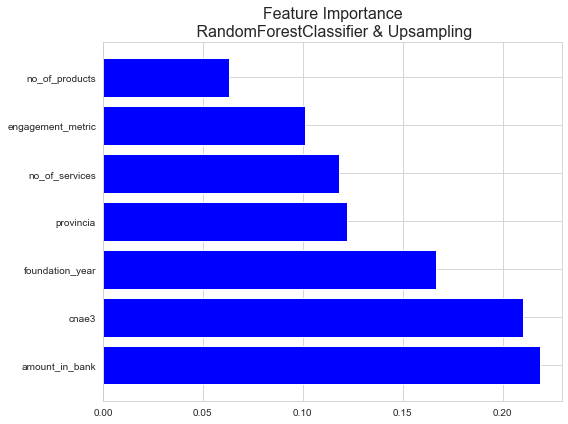

In [123]:
sns.set_style('whitegrid')

#getting importances
importances = rf.feature_importances_

#sort the feature importance in descending order
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 6))
plt.title('Feature Importance\n RandomForestClassifier & Upsampling', fontsize=16)
plt.barh(range(x_train.shape[1]), importances[sorted_indices], align='center', color='b')
plt.yticks(range(x_train.shape[1]), x_train.columns[sorted_indices])
plt.tight_layout()
plt.show()

## Observations
* Feature Importance is interpreted as follows: A higher score means that the specific feature will have a larger effect on the model that is being used to predict a certain variable
* `amount_in_bank` is the feature with more weight in the classification

# __Section 7:__ Hyperparameter Tuning with `RandomForestClassifier`

In [124]:
clf = RandomForestClassifier(random_state=123)

sorted(clf.get_params().keys())

['bootstrap',
 'ccp_alpha',
 'class_weight',
 'criterion',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'max_samples',
 'min_impurity_decrease',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'n_estimators',
 'n_jobs',
 'oob_score',
 'random_state',
 'verbose',
 'warm_start']

In [125]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid

# parameters
param_grid = [
    {
        'max_depth': [5, 15, 30, None],
        'n_estimators': [100, 150, 200],
        "max_samples": [0.6, 0.8],
        'max_features': [0.6, 0.8],
        'min_samples_leaf': [2, 5],
        'min_samples_split': [2, 5]
    }]

combinations = len(ParameterGrid(param_grid))
f'There is a total of {combinations} possible combinations of parameters'

'There is a total of 192 possible combinations of parameters'

# __Section 8:__ `RandomForestClassifier` with best parameters

In [126]:
#using best parameters 
rf_best_params = RandomForestClassifier(max_depth=30,
                            max_features=0.8,
                            max_samples=0.8,
                            min_samples_leaf=2,
                            min_samples_split=2,
                            n_estimators=200,
                            random_state=123)

In [127]:
rf_best_params.fit(x_train, y_train)
y_hat = rf_best_params.predict(x_test)
accuracy = accuracy_score(y_test, y_hat)
roc_auc = cross_val_score(model, x_train, y_train, cv=10, scoring='roc_auc').mean()
precision = precision_score(y_test, y_hat)
recall = recall_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat)

In [128]:
final_random_forest = []

final_random_forest.append({
        "model": 'RandomForestClf with best params',
        "roc_auc" : roc_auc,
        "precision": precision, 
        'f1': f1, 
        'accuracy': accuracy, 
        'recall':recall})

In [129]:
final_random_forest_df = pd.DataFrame(final_random_forest, 
                                      columns = ['model','recall', 'precision',
                                                 "accuracy", 'f1', 'roc_auc']).sort_values(by = ["roc_auc"], ascending=False).set_index('model')
final_random_forest_df 

,recall,precision,accuracy,f1,roc_auc
model,,,,,
RandomForestClf with best params,0.992193,0.901317,0.94009,0.944574,0.807679


## Observations
* `recall`, `precision`, `accuracy` and `f1` values were improved after hyperparameter tuning
* `roc_auc` decreased from `0.993628` to `0.843358` after hyperparameeter tuning
* Since our target variable is balanced thanks to `upsampling` we can rely on the `roc_auc` to measure overall performance
* After hyperparameter tuning `roc_auc` metric decreased by ~15% which I think is a significant decrease in performance

# __Section 9:__ Visualizations

In [130]:
rf = RandomForestClassifier(random_state=123)

rf.fit(x_train, y_train)
y_hat = rf.predict(x_test)

In [131]:
from sklearn.metrics import confusion_matrix

In [132]:
def plot_conf_matrix (conf_matrix, dtype):
    class_names = [0,1]
    fontsize=14
    df_conf_matrix = pd.DataFrame(
            conf_matrix, index=class_names, columns=class_names, 
        )
    fig = plt.figure()
    heatmap = sns.heatmap(df_conf_matrix, annot=True, fmt="d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion Matrix for {0}'.format(dtype))

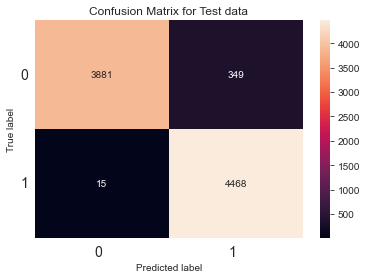

In [133]:
plot_conf_matrix(confusion_matrix(y_test, y_hat), "Test data")

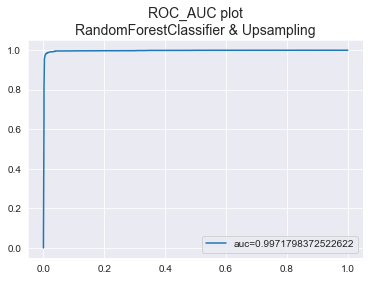

In [134]:
from sklearn import metrics
from sklearn.metrics import roc_curve

sns.set_style('darkgrid')

y_pred_proba = rf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.title("ROC_AUC plot\nRandomForestClassifier & Upsampling", fontsize=14)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Predictions

In [137]:
test.isnull().sum()

id                    0
cnae3                 0
provincia            27
foundation_year       0
engagement_metric     0
no_of_services        0
no_of_products        0
amount_in_bank        0
dtype: int64

In [138]:
test['provincia'].fillna("00", inplace=True)

In [139]:
test.isnull().sum()

id                   0
cnae3                0
provincia            0
foundation_year      0
engagement_metric    0
no_of_services       0
no_of_products       0
amount_in_bank       0
dtype: int64

In [140]:
#prediction on test data
test_no_target = test.drop(columns=['id']) #droping from train so that df shapes match

y_predicted = rf.predict(test_no_target)

In [141]:
test_id = test['id']

#concatenating
predictions = pd.concat([test_id, pd.DataFrame(y_predicted)], axis=1)

predictions['predictions'] = y_predicted

predictions = predictions[['id', 'predictions']]

In [142]:
predictions.shape

(2852, 2)

In [143]:
predictions.head()

,id,predictions
0,458072,0
1,516331,0
2,3424,0
3,880645,0
4,31272,0


In [145]:
#exporting CSV file
predictions.to_csv('emiliano_delia.txt', index=False, sep=';')